In [171]:
!uv sync --frozen --no-install-project --no-dev --no-cache

Audited 112 packages in 23ms


In [172]:
from kagglehub import dataset_download

DATASET_PATH = dataset_download("vikrishnan/boston-house-prices") + "/housing.csv"
COLUMN_NAMES = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [173]:
import pandas as pd
df = pd.read_csv(DATASET_PATH, header=None, delimiter=r"\s+", names=COLUMN_NAMES)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [175]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


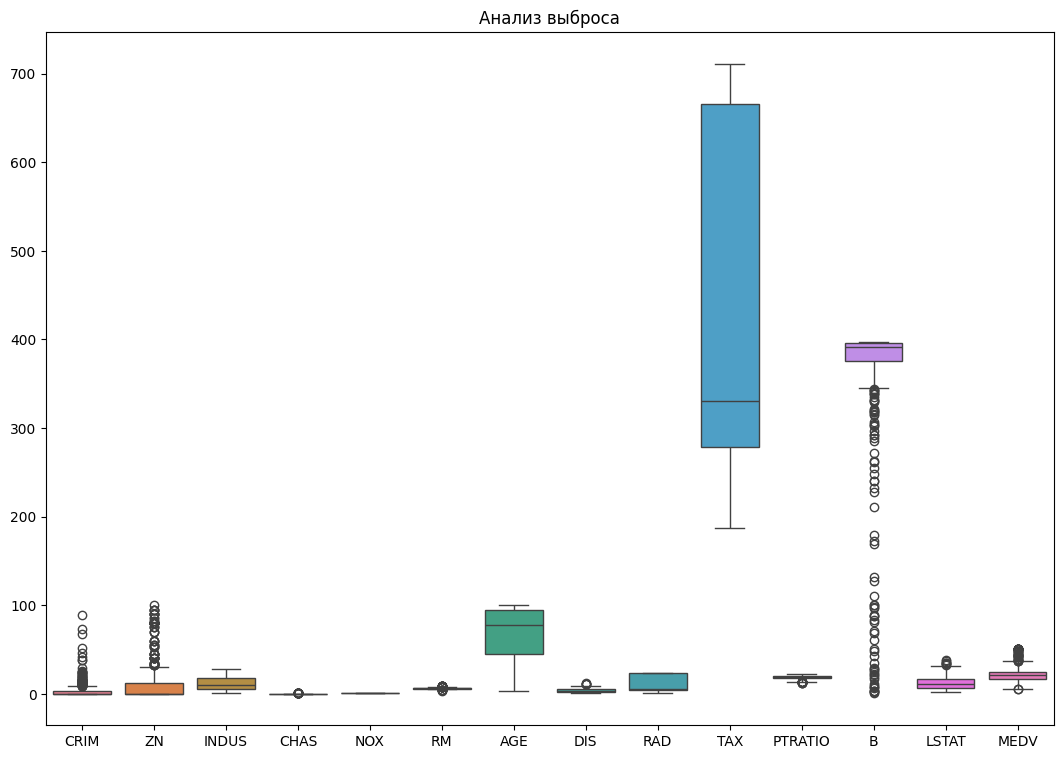

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
# Анализ выброса
plt.figure(figsize=(13, 9))
sns.boxplot(df)
plt.title("Анализ выброса")
plt.show()

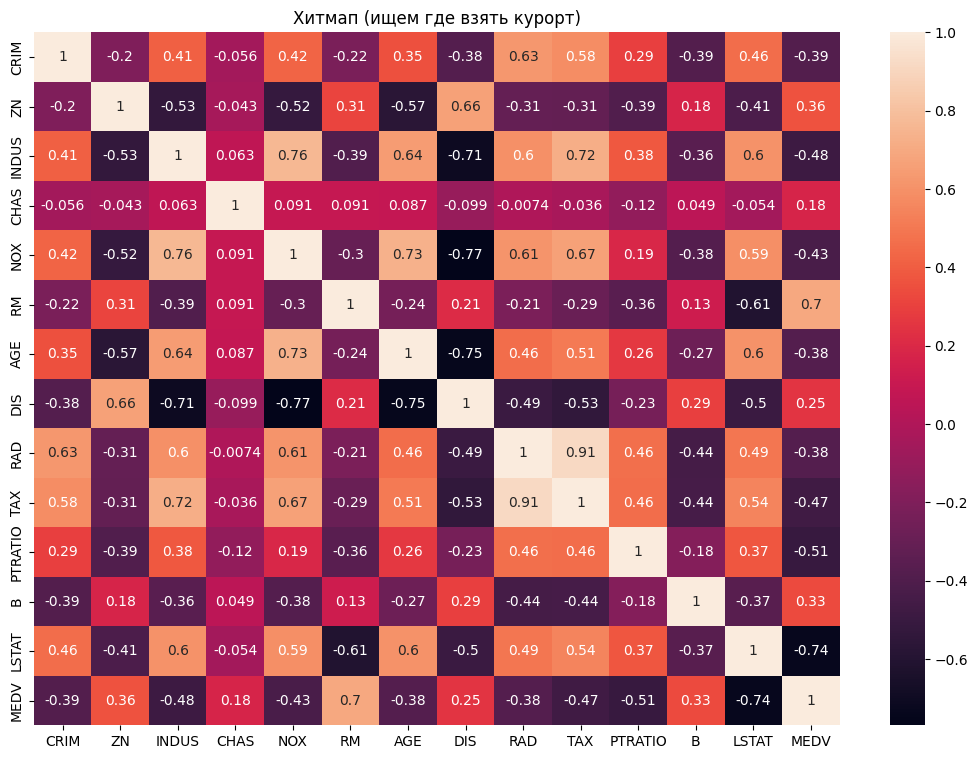

In [177]:
plt.figure(figsize=(13, 9))
sns.heatmap(df.corr(), annot=True)
plt.title("Хитмап (ищем где взять курорт)")
plt.show()

```
CRIM - уровень преступности в городе
ZN - доля жилой зоны более 25,000 квадратных футов
INDUS - доля акров не ретейлерского бизнеса в городе
CHAS - 1 если имеет общую границу с рекой, 0 если нет
NOX - концентрация оксидов азота (частей на 10 млн)
RM - среднее количество комнат в жилище
AGE - доля занятой земли застроенной до 1940 года
DIS - взвешанное расстояние от 5 бостонских центров трудоустройства
RAD - индекс близости к радиальным шоссе
TAX - налог на полную стоимость земли на 10 000 долларов
PTRATIO - доля количества студентов к количеству учителей в городе
B - 1000 * (Bk - 0,63) ^ 2, где Bk - доля чернокожих в городе
LSTAT - % населения в низком статусе
MEDV - медианная стоимость занятой земли в 1000 долларов

Target: MEDV

In [178]:
target = df["MEDV"]
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [179]:
params = df.drop("MEDV", axis=1)
params

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [180]:
from sklearn.model_selection import train_test_split

params_train, params_test, target_train, target_test = train_test_split(params, target, test_size=0.25, train_size=0.75)

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

linear_regression_pipeline = Pipeline([("Scaler", StandardScaler()), ("LinearRegression", LinearRegression())])
linear_regression_pipeline

,steps,"[('Scaler', ...), ('LinearRegression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [182]:
linear_regression_pipeline.fit(params_train, target_train)

,steps,"[('Scaler', ...), ('LinearRegression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [183]:
model_1 : LinearRegression = linear_regression_pipeline.named_steps["LinearRegression"]
target_pred = linear_regression_pipeline.predict(params_test)

In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(target_test, target_pred)
MAE

3.5340992873614105

In [185]:
MSE = mean_squared_error(target_test, target_pred)
MSE

27.74536018717622

In [186]:
R2 = r2_score(target_test, target_pred)
R2

0.6919487010256369

In [187]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_pipeline = Pipeline([("Scaler", StandardScaler()), ("RandomForestRegressor", RandomForestRegressor())])
random_forest_regressor_pipeline

,steps,"[('Scaler', ...), ('RandomForestRegressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [188]:
random_forest_regressor_pipeline.fit(params_train, target_train)

,steps,"[('Scaler', ...), ('RandomForestRegressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [189]:
model_2 : RandomForestRegressor = random_forest_regressor_pipeline.named_steps["RandomForestRegressor"]
target_pred = linear_regression_pipeline.predict(params_test)

In [190]:
MAE = mean_absolute_error(target_test, target_pred)
MAE

3.5340992873614105

In [191]:
MSE = mean_squared_error(target_test, target_pred)
MSE

27.74536018717622

In [192]:
R2 = r2_score(target_test, target_pred)
R2

0.6919487010256369

In [193]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor_pipeline = Pipeline([("Scaler", StandardScaler()), ("DecisionTreeRegressor", DecisionTreeRegressor())])
decision_tree_regressor_pipeline

,steps,"[('Scaler', ...), ('DecisionTreeRegressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [194]:
decision_tree_regressor_pipeline.fit(params_train, target_train)

,steps,"[('Scaler', ...), ('DecisionTreeRegressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [195]:
model_3 : DecisionTreeRegressor = decision_tree_regressor_pipeline.named_steps["DecisionTreeRegressor"]
target_pred = decision_tree_regressor_pipeline.predict(params_test)

In [196]:
MAE = mean_absolute_error(target_test, target_pred)
MAE

2.9818897637795283

In [197]:
MSE = mean_squared_error(target_test, target_pred)
MSE

16.658031496062993

In [198]:
R2 = r2_score(target_test, target_pred)
R2

0.8150491395282075

```
Decision Tree показывает наилучший результат среди нескольких испытаний!

In [199]:
pd.DataFrame({"Params": params_train.columns, "Weights": model_1.coef_})

,Params,Weights
0,CRIM,-1.382735
1,ZN,0.825645
2,INDUS,0.161591
3,CHAS,0.504754
4,NOX,-1.707574
5,RM,3.003144
6,AGE,-0.213153
7,DIS,-2.946718
8,RAD,2.466112
9,TAX,-1.793582


In [200]:
pd.DataFrame({"Params": params_train.columns, "Weights": model_2.feature_importances_})

,Params,Weights
0,CRIM,0.035630
1,ZN,0.001071
2,INDUS,0.007406
3,CHAS,0.001177
4,NOX,0.019284
5,RM,0.375926
6,AGE,0.023696
7,DIS,0.057076
8,RAD,0.004175
9,TAX,0.011549


In [201]:
pd.DataFrame({"Params": params_train.columns, "Weights": model_3.feature_importances_})

,Params,Weights
0,CRIM,0.015043
1,ZN,0.000543
2,INDUS,0.007048
3,CHAS,0.000000
4,NOX,0.024214
5,RM,0.282877
6,AGE,0.014870
7,DIS,0.085797
8,RAD,0.000044
9,TAX,0.003616
